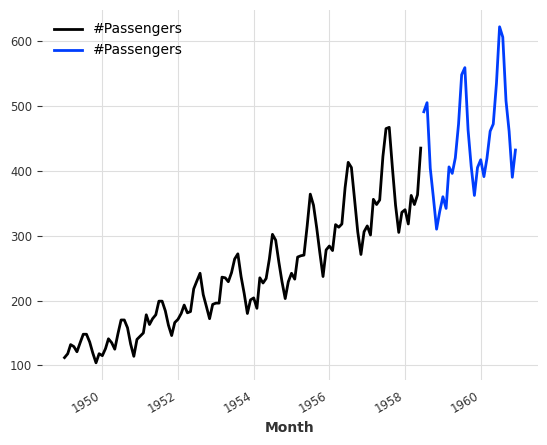

In [2]:
from darts.datasets import AirPassengersDataset

series = AirPassengersDataset().load()
training, validation = series.split_before(0.80)
training.plot()
validation.plot()

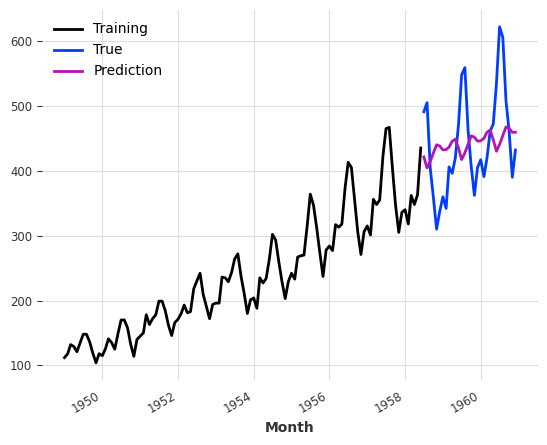

In [3]:
from darts.models import Theta

# Fit the theta model
model_theta = Theta()
model_theta.fit(training)

# Validation prediction
pred_theta = model_theta.predict(len(validation))

# Visualize
training.plot(label='Training')
validation.plot(label='True')
pred_theta.plot(label='Prediction')

In [4]:
from darts.utils.utils import SeasonalityMode

parameters = {'theta': [0.5, 1., 1.5, 2., 2.5],
              'season_mode': [SeasonalityMode.MULTIPLICATIVE, SeasonalityMode.ADDITIVE]}

best_model, best_params, best_score = Theta.gridsearch(parameters=parameters, series=training, start=0.5, forecast_horizon=12)

In [5]:
best_params

{'theta': 2.5,
 'season_mode': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>}